## Logistic Regression Challenge

In [2]:
#import the required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics.cluster import contingency_matrix

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [3]:
#upload X_traina
X_train = pd.read_fwf(
    r'~/Documents/LHL/Week_5/D2/logistic_regression_exercise/Smartphone Sensor Data/train/X_train.txt',header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
#upload y_train
y_train = pd.read_fwf(
    r'~/Documents/LHL/Week_5/D2/logistic_regression_exercise/Smartphone Sensor Data/train/y_train.txt',header=None)
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


In [5]:
#upload features
features =  pd.read_fwf(
    r'~/Documents/LHL/Week_5/D2/logistic_regression_exercise/Smartphone Sensor Data/features.txt',header=None)
features.head()

,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y


In [6]:
#Turn the features into a list and set as column names for X_train
cols = features[0].tolist()
X_train.columns = cols

In [7]:
#view data
X_train

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFre,553 fBodyBodyGyroJerkMag-skewnes,554 fBodyBodyGyroJerkMag-kurtosi,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),grav","557 angle(tBodyGyroMean,gravityM","558 angle(tBodyGyroJerkMean,grav","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [8]:
#rename first column in y_train
arr = y_train.columns.tolist()
arr
arr[0] = 'Rank'
y_train.columns = arr

In [8]:
#view y train
y_train.head()

,Rank
0,5
1,5
2,5
3,5
4,5


In [9]:
#create conditions based on first column and make new column based on those conditions
Conditions = [
    (y_train['Rank'] <= 3),
    (y_train['Rank'] >= 4)
]

values = [1, 0]

y_train['Target'] = np.select(Conditions, values)
y_train.head()

,Rank,Target
0,5,0
1,5,0
2,5,0
3,5,0
4,5,0


### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [10]:
#check column name
X_train.iloc[:,53]

0      -0.123213
1      -0.114893
2      -0.114893
3      -0.121336
4      -0.121834
          ...   
7347   -0.234998
7348   -0.234998
7349   -0.216004
7350   -0.210542
7351   -0.212149
Name: 54 tGravityAcc-min()-Y, Length: 7352, dtype: float64

In [11]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [12]:
#create instance
log_reg = LogisticRegression()

In [13]:
x = X_train['54 tGravityAcc-min()-Y'].values.reshape(-1,1)
y = y_train["Target"].values

#fit to log regression
log_reg.fit(x,y)

LogisticRegression()

In [14]:
#print coefficeint
log_reg.coef_

array([[-7.26026603]])

In [15]:
#print slope and intercept
print("The slope is:", log_reg.coef_[0][0])
print("The intercept is:", log_reg.intercept_[0])

The slope is: -7.2602660322946
The intercept is: -0.8111091670233679


In [16]:
#Check shape
x.shape

(7352, 1)

In [17]:
#Reshape X
x_points = np.reshape(x, (7352, ))

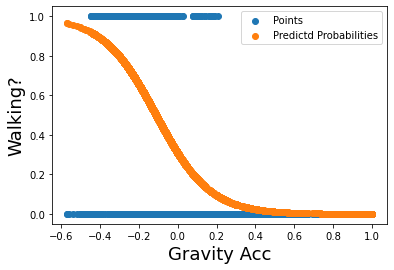

In [18]:
#define function to calculate sigmoid curve of x
def sigmoid_curve(x):
    return 1 / (1 + np.exp(-x))

#plot sigmoid curve
plt.scatter(x,y, label = 'Points')
plt.scatter(x_points, sigmoid_curve(log_reg.coef_[0][0]*x_points+log_reg.intercept_[0]),
           label = 'Predictd Probabilities')
plt.xlabel('Gravity Acc', size=18)
plt.ylabel('Walking?', size=18)
plt.legend()
plt.show()

In [19]:
#import stats
import statsmodels.api as sm
from statsmodels.formula.api import logit

#Stats table
log_reg2 = sm.Logit(y, sm.add_constant(x)).fit()
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.460220
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7352
Model:                          Logit   Df Residuals:                     7350
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:                  0.3306
Time:                        10:08:41   Log-Likelihood:                -3383.5
converged:                       True   LL-Null:                       -5054.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8621      0.044    -19.534      0.000      -0.949      -0.776
x1            -7.6125      0.

In [20]:
#double check params
log_reg2.params

array([-0.86212006, -7.61245307])

### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [21]:
#create instance
All_reg = LogisticRegression()
All_reg.fit(X_train,y_train["Target"].values)

LogisticRegression()

In [22]:
#print slope and intercept
print("The slope is:", All_reg.coef_[0][0])
print("The intercept is:", All_reg.intercept_[0])

The slope is: 0.15902915673970422
The intercept is: 10.308668222960314


In [23]:
#put features and coefficients into dataframe
data = {'features': X_train.columns, 'coefficients':All_reg.coef_[0]}
data = pd.DataFrame(data)
data.head()

,features,coefficients
0,1 tBodyAcc-mean()-X,0.159029
1,2 tBodyAcc-mean()-Y,0.035052
2,3 tBodyAcc-mean()-Z,-0.012081
3,4 tBodyAcc-std()-X,0.297960
4,5 tBodyAcc-std()-Y,0.151696


In [24]:
#print numer of features, significant and not
print("Number of features:", data.shape[0])
print("Number of significant", data[data['coefficients'] > 0.05].count())
print("Number of non-significant", (data.shape[0] - data[data['coefficients'] > 0.05].count()))

Number of features: 561
Number of significant features        244
coefficients    244
dtype: int64
Number of non-significant features        317
coefficients    317
dtype: int64


### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

#### First doing it with Class column in y for bivariate selection

In [25]:
#check column 18
X_train.iloc[:,18]

0      -0.994612
1      -0.998405
2      -0.999470
3      -0.999504
4      -0.999757
          ...   
7347   -0.473463
7348   -0.495789
7349   -0.271194
7350   -0.279718
7351   -0.368309
Name: 19 tBodyAcc-energy()-Z, Length: 7352, dtype: float64

In [52]:
#create univariate instance
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')

In [53]:
#create variables
m = X_train['4 tBodyAcc-std()-X'].values.reshape(-1,1) #column 4
n = X_train['54 tGravityAcc-min()-Y'].values.reshape(-1,1) #column 54
o = X_train['19 tBodyAcc-energy()-Z'].values.reshape(-1,1) #column 19
z = y_train["Rank"].values #target


#fit to log regression
model_1 = log_reg.fit(m,z)
model_2 = log_reg.fit(n,z)
model_3 = log_reg.fit(o,z)

In [60]:
# print the scores of each model
print("Score of model 1:", model_1.score(x,z))
print("Score of model 2:", model_2.score(m,z))
print("Score of model 3:", model_3.score(n,z))

Score of model 1: 0.3785364526659412
Score of model 2: 0.3785364526659412
Score of model 3: 0.1459466811751904


In [61]:
#classification for first model
z_predict = model_1.predict(m)
report = classification_report(z, z_predict)
print(report)

              precision    recall  f1-score   support

           1       0.21      0.03      0.05      1226
           2       0.33      1.00      0.49      1073
           3       0.00      0.00      0.00       986
           4       0.00      0.00      0.00      1286
           5       0.39      0.75      0.51      1374
           6       0.51      0.46      0.48      1407

    accuracy                           0.38      7352
   macro avg       0.24      0.37      0.26      7352
weighted avg       0.25      0.38      0.27      7352



/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#classification for first model
z_predict = model_2.predict(n)
report = classification_report(z, z_predict)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1226
           2       0.15      1.00      0.25      1073
           3       0.00      0.00      0.00       986
           4       0.00      0.00      0.00      1286
           5       0.00      0.00      0.00      1374
           6       0.00      0.00      0.00      1407

    accuracy                           0.15      7352
   macro avg       0.02      0.17      0.04      7352
weighted avg       0.02      0.15      0.04      7352



/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#classification for first model
y_predict = model_3.predict(o)
report = classification_report(z, z_predict)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1226
           2       0.15      1.00      0.25      1073
           3       0.00      0.00      0.00       986
           4       0.00      0.00      0.00      1286
           5       0.00      0.00      0.00      1374
           6       0.00      0.00      0.00      1407

    accuracy                           0.15      7352
   macro avg       0.02      0.17      0.04      7352
weighted avg       0.02      0.15      0.04      7352



/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/LHLBootcamp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 1 contingency_matrix


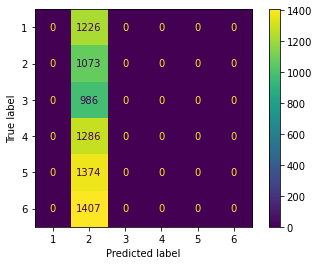

In [63]:
print("Model 1 contingency_matrix")
plot_confusion_matrix(model_1, n, z)

Model 2 contingency_matrix


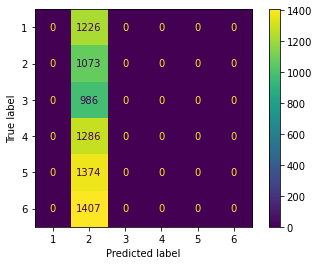

In [64]:
print("Model 2 contingency_matrix")
plot_confusion_matrix(model_2, n, z)

Model 3 contingency_matrix


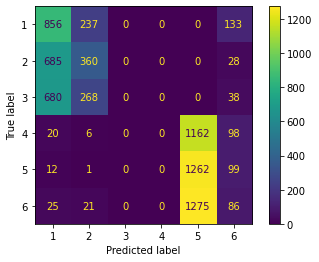

In [65]:
#contingency_matrix(y, y_predict)
print("Model 3 contingency_matrix")
plot_confusion_matrix(model_3, o, z)

#### Checking all feautures

In [66]:
#create instance and fit
All_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
Model_all = All_reg.fit(X_train,y_train["Rank"].values)

In [67]:
#print score
print("Score of model 1:", Model_all.score(X_train,y_train["Rank"]))

Score of model 1: 0.9923830250272034


In [68]:
#Create prediction
y_predict = Model_all.predict(X_train)

#print report
report = classification_report(y_train["Rank"], y_predict)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352



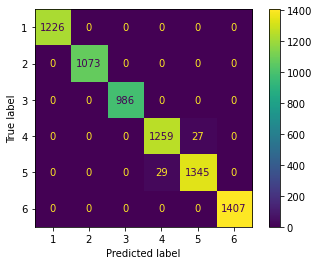

In [69]:
#confusion matrix
plot_confusion_matrix(Model_all, X_train, y_train["Rank"])

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

First will try it with Binomial Column

In [40]:
#looking at cofficients that are greater than 0.2 (20%)
data[data['coefficients'] > 0.2].head()

,features,coefficients
3,4 tBodyAcc-std()-X,0.297960
6,7 tBodyAcc-mad()-X,0.277789
9,10 tBodyAcc-max()-X,0.505672
19,20 tBodyAcc-iqr()-X,0.228920
22,23 tBodyAcc-entropy()-X,0.286169


In [41]:
#select features
a = X_train[['10 tBodyAcc-max()-X','53 tGravityAcc-min()-X','57 tGravityAcc-energy()-X',
         '103 tBodyAccJerk-entropy()-X','160 tBodyGyro-correlation()-Y,Z',
         '288 fBodyAcc-entropy()-X','367 fBodyAccJerk-entropy()-X']]
b = y_train["Target"].values #target

In [42]:
#create instance
reg = LogisticRegression()

In [43]:
#fit data
top_features = log_reg.fit(a,b)

In [44]:
#print accuracy
print("Score of model:", top_features.score(a,b))

Score of model: 0.9998639825897715


In [45]:
#prediction
y_predict = top_features.predict(a)

#classification report
report = classification_report(b, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4067
           1       1.00      1.00      1.00      3285

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



Top 7 features contingency_matrix


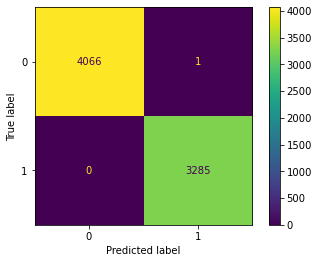

In [46]:
#plot confusion matrix
print("Top 7 features contingency_matrix")
plot_confusion_matrix(top_features, a, b)

### Now multivariate

In [74]:
#Model_all.coef_[0]

In [76]:
#first create coef table from task 3 multi all_reg
multi_data = {'features': X_train.columns, 'coefficients':Model_all.coef_[0]}
multi_data = pd.DataFrame(multi_data)
multi_data.head()

,features,coefficients
0,1 tBodyAcc-mean()-X,-0.022955
1,2 tBodyAcc-mean()-Y,-0.041836
2,3 tBodyAcc-mean()-Z,0.060377
3,4 tBodyAcc-std()-X,-0.373214
4,5 tBodyAcc-std()-Y,0.240035


In [87]:
#looking at cofficients that are greater than 0.6 (60%)
multi_data[multi_data['coefficients'] > 0.6]

,features,coefficients
37,"38 tBodyAcc-correlation()-X,Y",1.218554
102,103 tBodyAccJerk-entropy()-X,0.686863
104,105 tBodyAccJerk-entropy()-Z,0.848780
117,118 tBodyAccJerk-correlation()-X,1.051830
118,119 tBodyAccJerk-correlation()-X,0.701922
156,"157 tBodyGyro-arCoeff()-Z,4",0.670489
159,"160 tBodyGyro-correlation()-Y,Z",0.803535
198,199 tBodyGyroJerk-correlation()-,1.278665
199,200 tBodyGyroJerk-correlation()-,0.755834
450,451 fBodyGyro-maxInds-Z,0.791092


In [95]:
#select features from aboce
c = X_train[['38 tBodyAcc-correlation()-X,Y','103 tBodyAccJerk-entropy()-X','105 tBodyAccJerk-entropy()-Z',
            '118 tBodyAccJerk-correlation()-X','119 tBodyAccJerk-correlation()-X','157 tBodyGyro-arCoeff()-Z,4',
            '160 tBodyGyro-correlation()-Y,Z','199 tBodyGyroJerk-correlation()-','200 tBodyGyroJerk-correlation()-',
            '451 fBodyGyro-maxInds-Z']]
d = y_train["Rank"] #target

In [96]:
#instantiate 
multi_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')

#fit
multi_top_features = multi_reg.fit(c,d)

#print accuracy
print("Score of model:", multi_top_features.score(c,d))

Score of model: 0.6875680087051143


In [99]:
#prediction
y_predict = multi_top_features.predict(c)

#print classification report
report = classification_report(d, y_predict)
print(report)

              precision    recall  f1-score   support

           1       0.87      0.88      0.87      1226
           2       0.78      0.81      0.79      1073
           3       0.80      0.77      0.79       986
           4       0.57      0.56      0.56      1286
           5       0.58      0.55      0.57      1374
           6       0.59      0.62      0.60      1407

    accuracy                           0.69      7352
   macro avg       0.70      0.70      0.70      7352
weighted avg       0.69      0.69      0.69      7352



Top 10 features multivariate contingency_matrix


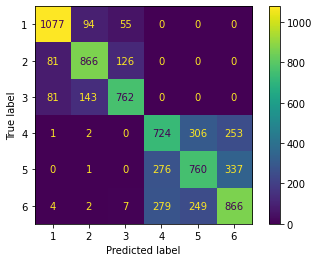

In [100]:
#plot confusion matrix
print("Top 10 features multivariate contingency_matrix")
plot_confusion_matrix(multi_top_features, c, d)

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.